# GEOG5995M Final Assignment 1

Student ID number: 201323937

Data Visualisation One

In [68]:
# reading in all required packages

# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# for data manipulation
import pandas as pd
import numpy as np

# for statistical modelling/ machine learning

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

#remove warnings from notebook
import warnings
warnings.filterwarnings('ignore')

import geopandas as gpd
import pyproj
import contextily as ctx
import seaborn as sns

import geoplot as gplt
import geoplot.crs as gcrs

This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>



In [69]:
# Import the pandas package
import pandas as pd

# loading the London data set as 
london = pd.read_csv('/Users/pickl/OneDrive/Desktop/Geog5995/GEOG5995-main/Student_ID_201323937/london_merged.csv')

# viewing first 5 rows
london.head()


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1,0,1,3


In [70]:
#using the describe function to explore descriptive statistics and assess for any outliers or N/A results
london.describe()


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [71]:
#using the dropna function to remove any N/A results
london.dropna

<bound method DataFrame.dropna of               timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0      04/01/2015 00:00   182  3.0  2.0   93.0         6.0             3   
1      04/01/2015 01:00   138  3.0  2.5   93.0         5.0             1   
2      04/01/2015 02:00   134  2.5  2.5   96.5         0.0             1   
3      04/01/2015 03:00    72  2.0  2.0  100.0         0.0             1   
4      04/01/2015 04:00    47  2.0  0.0   93.0         6.5             1   
...                 ...   ...  ...  ...    ...         ...           ...   
17409  03/01/2017 19:00  1042  5.0  1.0   81.0        19.0             3   
17410  03/01/2017 20:00   541  5.0  1.0   81.0        21.0             4   
17411  03/01/2017 21:00   337  5.5  1.5   78.5        24.0             4   
17412  03/01/2017 22:00   224  5.5  1.5   76.0        23.0             4   
17413  03/01/2017 23:00   139  5.0  1.0   76.0        22.0             2   

       is_holiday  is_weekend  season  
0            

Text(0.5, 0, 'Season')

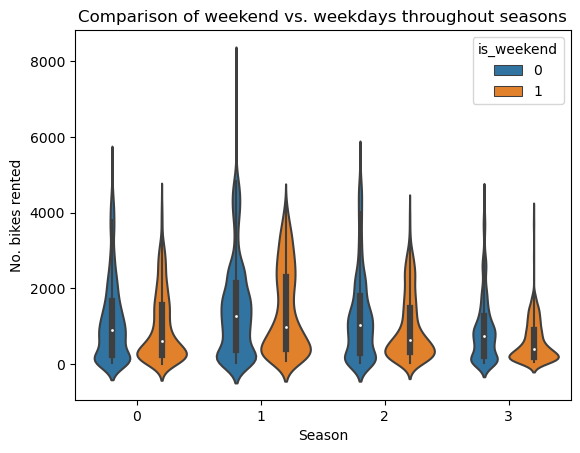

In [72]:
#code to produce a violin plot
sns.violinplot(x='season', y='cnt',  hue='is_weekend', data=london);
#adds a title for graph
plt.title("Comparison of weekend vs. weekdays throughout seasons")
#adds a title for each axis
plt.ylabel("No. bikes rented")
plt.xlabel("Season")

A violin plot was chosen for this data visualisation for a number of reasons. Violin plots combine boxplots with density trace plots, visualising the center, spread, asymmetry and outliers of the variable whilst plotting the density trace symetrically for greater ease of visual analysis  <a href="#ref1">[1]</a> . These types of plot were born out of Benjamini’s suggestion to ‘open the box’ within box plots allowing for more information to be added to the visualisation whilst still allowing for comparisons to be made  <a href="#ref2">[2]</a>. Using a violin plot we are able to visualise multiple variables at once and gain greater ease of visual analysis between them, whilst also gaining access to the symmetry, scale and distribution of the data in a similar way to analysis of descriptive statistics. They also show any clusters formed within the data. Violin plots are built around kernal density, where points with a larger number of data or responses are layered on top of each other creating density curves. Violin plots differ from a traditional density plot as they formulate and proturde around a center line rather than building on top of a baseline. In bivariate and multivariate plots, violin plots are used to showcase the relationship between a categorical and a continuous variable. In this case, the categorical variable is the season and the continuous variable is the number of bikes rented. This plot also showcases another categorical variable, 'is_weekend'. This plot visualises the differences between bike rentals on weekdays versus weekends in each of the four seasons. 

Through analysis of this plot it becomes clear that throughout each season the upper quartile number of rental bikes in use is slightly higher on weekdays than on weekends. In season 1 this is most apparent. Seasons 0, 2 and 3 show a unimodal distribution for weekends with a higher density toward lower numbers of bikes being rented. The highest points for weekdays for season 1 and weekends for season 3 are clear outliers, extending far beyond the rest of the violin distribution. These points have a lower distribution of data than other periods with fewer bikes rented. These points showcase the busiest days in which there is a dramatic shift towards higher numbers of bike rentals, likely to be during public holidays or good weather periods. The data of weekday for season 1 clusters between 3000 and 5000 bikes rented. 

Data Visualisation Two: Spatial


In [73]:
#exploring the datasets stored within the geopandas package
gpd.datasets.available


['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [74]:
#checking that the Coordinate Reference Systems are the same for both data sets being used
print(countries.crs, cities.crs)

EPSG:4326 EPSG:4326


It is important when working with spatial datasets to ensure that the data share the same coordinate reference systems. The most common global datum is the World Geodetic System (WGS84) which uses the code ESPG 4326, as seen in the data used for this assessment.m

In [75]:
#check the file path for the data to ensure it is loaded from the correct place and is accessible in this notebook
countries_path = gpd.datasets.get_path('naturalearth_lowres')

print(countries_path)

C:\Users\pickl\anaconda3\envs\spatial_env\Lib\site-packages\geopandas\datasets\naturalearth_lowres\naturalearth_lowres.shp


In [76]:
cities_path = gpd.datasets.get_path('naturalearth_cities')
print(cities_path)

C:\Users\pickl\anaconda3\envs\spatial_env\Lib\site-packages\geopandas\datasets\naturalearth_cities\naturalearth_cities.shp


In [77]:
#Reading in the shape file data

countries = gpd.read_file(countries_path)

In [78]:
#using the dropna function to remove any N/A results
countries.dropna()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [79]:
#copy the cities dataframe
cities_buffer = cities.copy()

#this applies the function which replaces the geometry column with the buffer geometry
cities_buffer['geometry'] = cities.buffer(10)

cities_buffer.head()


,name,geometry
0,Vatican City,"POLYGON ((22.45339 41.90328, 22.40523 40.92311..."
1,San Marino,"POLYGON ((22.44177 43.93610, 22.39362 42.95592..."
2,Vaduz,"POLYGON ((19.51667 47.13372, 19.46852 46.15355..."
3,Lobamba,"POLYGON ((41.20000 -26.46667, 41.15184 -27.446..."
4,Luxembourg,"POLYGON ((16.13000 49.61166, 16.08185 48.63149..."


It is important to keep the information about the area being buffered within a newly made geobuffer frame. This is done by copying the dataset as shown above. 

In [80]:
cities.buffer(10, resolution=10)

0      POLYGON ((22.45339 41.90328, 22.33027 40.33894...
1      POLYGON ((22.44177 43.93610, 22.31865 42.37175...
2      POLYGON ((19.51667 47.13372, 19.39355 45.56938...
3      POLYGON ((41.20000 -26.46667, 41.07688 -28.031...
4      POLYGON ((16.13000 49.61166, 16.00689 48.04732...
                             ...                        
238    POLYGON ((-33.21212 -22.90731, -33.33523 -24.4...
239    POLYGON ((-36.62697 -23.55673, -36.75008 -25.1...
240    POLYGON ((161.21255 -33.87137, 161.08943 -35.4...
241    POLYGON ((113.85387 1.29498, 113.73076 -0.2693...
242    POLYGON ((124.18306 22.30693, 124.05995 20.742...
Length: 243, dtype: geometry

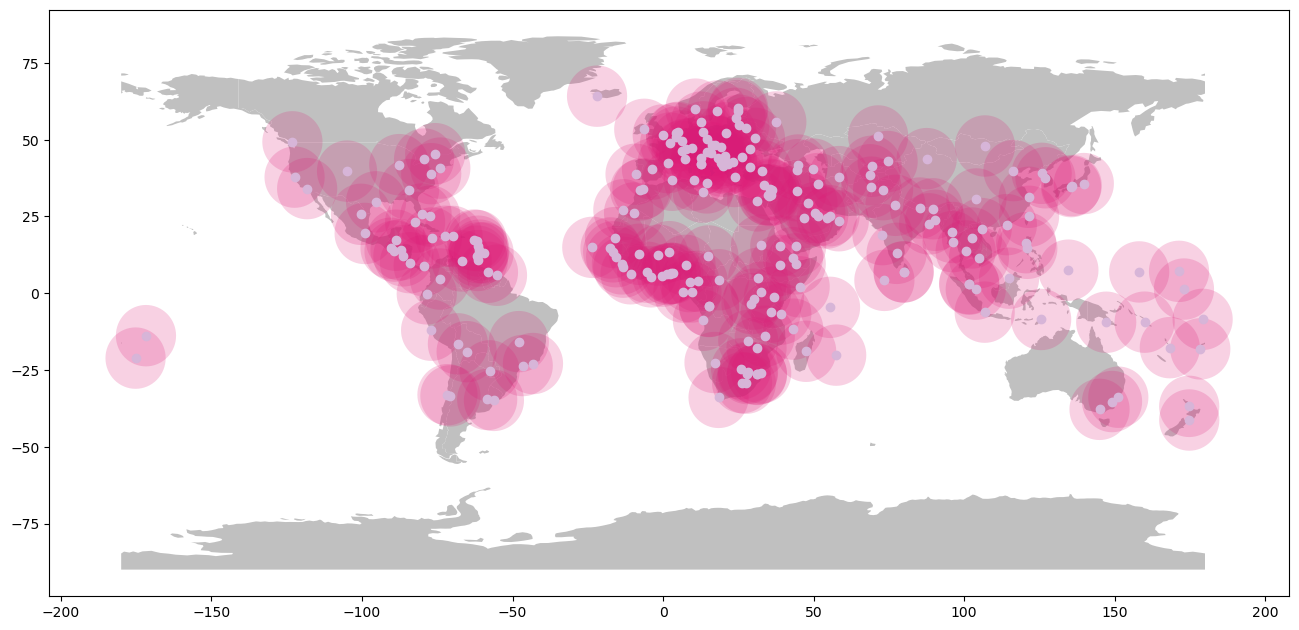

In [81]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='silver')

# plot the city buffers on the basemap axis, colour buffers blue
cities_buffer.plot(ax=base,color='#dd1c77', alpha=0.2)

# plot the cities on the basemap axis, colour the cities red
cities.plot(ax=base,color='#d7b5d8')

# shw the map
plt.show()

The colour scheme used in the spatial visualisation for this assessment was chosen from a selection on the resource 'colorbrewer’ <a href="#ref2">[3]</a>to ensure they are accessible and colour blind friendly. This colour scheme is identifiable, colour blind friendly and also aesthetically pleasing. The colours chosen also do not have any pre-existing ideas or meanings associated (e.g. green=good, red=bad etc) which may influence the way in which the map is viewed and interepreted by readers. I used a lighter colour for the basemap ('silver') than the preset colour ('grey') as I believe it is easier to view both the buffers and the points they surround when there is a lighter basemap. 

This type of geospatial visualisation is called a point buffer, which applies a buffer or circular area around points on a map within a given radius. The radius is specified in python through the ESPG code, as discovered earlier in this project to be ESPG4326 for this dataset. In this visualisation the buffer zones have intact boundaries as opposed to dissolved <a href="#ref2">[4]</a> . The opacity of the colour for the buffer zones was made low (0.2) to allow for this overlap to be visible. The points on this map represent cities which have been layered on top of the countries base map. The buffers show the radius around the cities and can be used for a range of reasons such as determining population in the surrounding areas of the city or determining areas for inclusion in urban planning projects. 

## References
<p><a href="https://www-tandfonline-com.sheffield.idm.oclc.org/doi/pdf/10.1080/00031305.1998.10480559?needAccess=true">[1]</a>Hintze, J. and Nelson, R. (1998), Violin Plots: A Box Plot-Density Trace Synergism, The American Statistician, Taylor and Francis</p>
<p><a href="https://www.tandfonline.com/doi/abs/10.1080/00031305.1988.10475580">[2]</a>Benjamini, Y. (1988), Opening the Box of the Box Plot, The American 
Statisticin, Taylor and Franicsa</p
<p><a href="https://colorbrewer2.org/#type=sequential&scheme=PuRd&n=5">[3]</a>ColorBrewer, ColorBrewer: Color advice for maps</p>
<p><a href="https://docs.qgis.org/3.28/en/docs/gentle_gis_introduction/vector_spatial_analysis_buffers.html">[4]</a>QGIS Documentation, Vector spatial analysis (Buffers)</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5995">[5]</a>GEOG5995M course materials</p>>